                                           # **项目实战：房地产市场洞察与价值评估**

## 数据分析流程

### 采集数据→确定分析方向→导入数据→数据清洗→数据分析→数据可视化

#### 数据源介绍

字段名	含义	说明

city	城市	房屋所在的城市名称，例如“合肥”、“重庆”等。

address	详细地址	房屋的具体位置，包含街道、交叉口等信息。

area	面积	房屋的面积，单位为平方米（㎡）。

floor	楼层	房屋所在的楼层信息，例如“中层（共18层）”。

name	小区名称	房屋所在的小区或楼盘名称。

price	价格	房屋的总价，单位为“万”或“元”。

province	省份	房屋所在的省份或直辖市名称。

rooms	户型	房屋的户型结构，例如“3室2厅”。

toward	朝向	房屋的朝向，例如“南北向”、“南向”等。

unit	单价	房屋的单价，单位为“元/㎡”。

year	建造年份	房屋的建造年份，例如“2013年建”。

origin_url	原始链接	房屋信息的来源网页链接。

## 分析及统计问题

编号	问题	分析主题	分析目标	分组字段	指标/方法

A1	哪些变量最影响房价？面积、楼层、房间数哪个影响更大？	特征相关性
	了解房屋各特征对房价的线性影响	无	皮尔逊相关系数

A2	全国房价总体分布是怎样的？是否存在极端值？	描述性统计	概览数值型字段的分布特征	无	平均数/中位数/四分位数/标准差

A3	哪些城市房价最高？直辖市与非直辖市差异如何？	城市对比	比较不同城市房价水平	city	均价/单价中位数/箱线图

A4	高价房在面积、楼层等方面有什么特征？	价格分层	识别不同价位房屋特征差异	价格分段(低中高)	列联表/卡方检验

A5	哪种户型最受欢迎？三室比两室贵多少？	户型分析	分析不同户型的市场表现	rooms	占比/平均单价/溢价率

A6	南北向是否真比单一朝向贵？贵多少？	朝向溢价	评估不同朝向的价格差异	toward	方差分析/多重比较

A7	新房比10年老房贵多少？折旧规律如何？	楼龄效应	研究建筑年份对房价的影响	year分段(5年间隔)	趋势线/回归分析

A8	哪些区域交易最活跃？新区和老城区哪个更贵？	区域热度	识别各城市热门交易区域	address(提取区域关键词)	交易量/价格增长率

A9	哪个面积段的性价比最高？超大户型有溢价吗？	面积区间	分析不同面积段的价格特征	area分段(50㎡间隔)	密度图/价格梯度

A10	中层真的比高层贵吗？差价是多少？	楼层差异	比较不同楼层的价格表现	floor(高中低层)	Kruskal-Wallis检验

A11	直辖市房价是否显著更高？单价和总价差异如何？	直辖市vs非直辖市	对比直辖市与非直辖市的房价差异	province	独立样本t检验/曼-惠特尼U检验


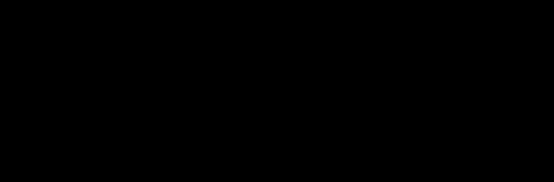

In [57]:
# 1. import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['font.family']='SimHei'

In [58]:
# 2. import data
df=pd.read_csv('data/house_sales.csv')

In [59]:
# 3. data overview
print('record amount:',len(df))
print('amount of columns:',len(df.columns))
print('sample:\n',df.head(5))
df.info()

record amount: 106118
amount of columns: 12
sample:
   city              address area     floor    name price province rooms  \
0   合肥   龙岗-临泉东路和王岗大道交叉口东南角  90㎡  中层（共18层）    圣地亚哥  128万       安徽  3室2厅   
1   合肥   龙岗-临泉东路和王岗大道交叉口东南角  90㎡  中层（共18层）    圣地亚哥  128万       安徽  3室2厅   
2   合肥      生态公园-淮海大道与大众路交口  95㎡  中层（共18层）  正荣·悦都荟  132万       安徽  3室2厅   
3   合肥      生态公园-淮海大道与大众路交口  95㎡  中层（共18层）  正荣·悦都荟  132万       安徽  3室2厅   
4   合肥  撮镇-文一名门金隅裕溪路与东风大道交口  37㎡  中层（共22层）  文一名门金隅   32万       安徽  2室1厅   

  toward      unit    year                                       origin_url  
0    南北向  14222元/㎡  2013年建  https://hf.esf.fang.com/chushou/3_404230646.htm  
1    南北向  14222元/㎡  2013年建  https://hf.esf.fang.com/chushou/3_404230646.htm  
2     南向  13895元/㎡  2019年建  https://hf.esf.fang.com/chushou/3_404304901.htm  
3     南向  13895元/㎡  2019年建  https://hf.esf.fang.com/chushou/3_404304901.htm  
4    南北向   8649元/㎡  2017年建  https://hf.esf.fang.com/chushou/3_404372096.htm  
<class 'pandas.core.frame.Da

In [61]:
# 4. data cleaning
df.drop(columns='origin_url',inplace=True)

In [62]:
# check missing and delete
df.isna().sum()
df.dropna(inplace=True)

In [63]:
# check duplicated
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [64]:
print('record amount:',len(df))

record amount: 28104


In [65]:
# data type convert
# area
df['area']=df['area'].str.replace('㎡','').astype(float)

# price
df['price']=df['price'].str.replace('万','').astype(float)

In [66]:
# toward
df['toward'].value_counts()

toward
南北向    15946
南向      9405
东南向     1114
东向       448
西南向      308
北向       276
西向       182
东西向      162
西北向      138
东北向      125
Name: count, dtype: int64

In [67]:
df['toward']=df['toward'].astype('category')

In [68]:
# unit
df['unit']=df['unit'].str.replace('元/㎡','').astype(float)

In [69]:
# year
df['year']=df['year'].str.replace('年建','').astype(int)

In [70]:
# abnormal values
# (1)area
df=df[(df['area']<600) & (df['area']>20)]

In [71]:
# (2)price （using IQR）
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
low_price=Q1-1.5*IQR
high_price=Q3+1.5*IQR
df=df[(df['price']<high_price) & (df['price']>low_price)]

In [72]:
df.head()
len(df)

26135

In [73]:
# 5. data structure and construction
#地区
df['district']=df['address'].str.split('-').str[0]

In [74]:
# 楼层类型
df['floor_type1']=df['floor'].str.split('（').str[0].astype('category')
def fun1(str1):
    if pd.isna(str1):
        return 'unknown'
    elif '低' in str1:
        return 'low floor type'
    elif '中' in str1:
        return 'medium floor type'
    elif '高' in str1:
        return 'high floor type'
    else:
        return 'unknown'
df['floor_type2']=df['floor'].apply(fun1).astype('category')

In [75]:
df.head()

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type1,floor_type2
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.0,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013,龙岗,中层,medium floor type
2,合肥,生态公园-淮海大道与大众路交口,95.0,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019,生态公园,中层,medium floor type
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.0,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017,撮镇,中层,medium floor type
6,合肥,龙岗-长江东路与和县里交口,50.0,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019,龙岗,高层,high floor type
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.0,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012,新亚汽车站,中层,medium floor type


In [ ]:
def fun2(str2):
    return True if str in ['北京','上海','天津','重庆'] else False
df['Municipality']=df['city'].apply(lambda x:fun2(x))
#lambda x: fun2(x)：创建一个匿名函数，它接收参数x，然后返回fun2(x)的结果
#or: df['Municipality']df['city'].apply(lambda x: 1 if x in return True if str in ['北京','上海','天津','重庆'] else 0)


In [77]:
# 卧室数量
df['bedrooms']=df['rooms'].str.split('室').str[0].astype(int)
#客厅数量
#df['living rooms'].str.split('室').str[1].str.split('厅').str[0].astype(int)
# 过于复杂，可采用正则表达式
df['living rooms']=df['rooms'].str.extract(r'(\d+)厅').astype(int)

In [79]:
#楼龄
df['building age']=2025-df['year']

In [81]:
#价格分段
df['price labels']=pd.cut(df['price'],bins=4,labels=['low','medium','high','extreme'])

In [82]:
df.sample(10)

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type1,floor_type2,bedrooms,living rooms,building age,price labels
19802,无极,高营-体育大街与北二环交汇处北行600米路西,109.00,高层（共33层）,瀚唐,168.0,河北,3室2厅,南北向,15413.0,2015,高营,高层,high floor type,3,2,10,high
26280,武安,峰峰矿区-跃进大街,50.00,中层（共20层）,朝阳商住楼,31.0,河北,3室1厅,南北向,6200.0,2019,峰峰矿区,中层,medium floor type,3,1,6,low
20006,平山,合作路-广源路5号(国泰街与西二环交口东北角),68.00,中层（共5层）,合作西区,105.0,河北,2室2厅,南北向,15441.0,1997,合作路,中层,medium floor type,2,2,28,medium
66274,惠州,淡水-淡水镇长安南路与熊猫大道交汇处泳富居小区(人,87.00,中层（共26层）,左岸春天,71.0,广东,3室2厅,南向,8161.0,2013,淡水,中层,medium floor type,3,2,12,low
106044,连江,五一广场-高桥支路6号,116.00,中层（共8层）,华信花园,280.0,福建,3室2厅,南北向,24138.0,2003,五一广场,中层,medium floor type,3,2,22,extreme
105630,崇州,东光-二环琉璃路口(东湖公园旁),37.00,中层（共30层）,中港CCPARK,50.0,四川,1室1厅,南向,13514.0,2019,东光,中层,medium floor type,1,1,6,low
38808,安庆,宜秀区-西湖绿洲城四期西湖绿洲城四期,82.71,高层（共14层）,西湖绿洲城四期,72.0,安徽,2室2厅,南向,8705.0,2017,宜秀区,高层,high floor type,2,2,8,low
30022,德惠,"远达大街-远达大街2999号(远达大街以西,宜良路以南",127.80,高层（共18层）,保利百合香湾,128.0,吉林,3室2厅,南北向,10016.0,2012,远达大街,高层,high floor type,3,2,13,medium
77546,太原,桃园南路-桃南电镀厂宿舍桃园南路43号,94.66,中层（共6层）,桃南电镀厂宿舍,125.0,山西,3室2厅,南北向,13205.0,1997,桃园南路,中层,medium floor type,3,2,28,medium
4070,福清,玉屏街道-西区板块清昌大道(元洪路)北侧,168.00,高层（共18层）,福清国际华城,282.0,福建,4室2厅,南北向,16786.0,2008,玉屏街道,高层,high floor type,4,2,17,extreme


## Question part

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

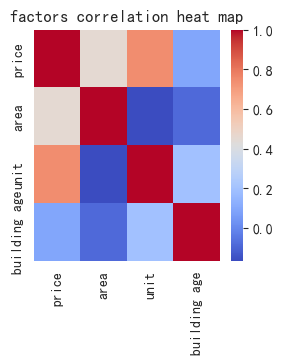

In [96]:
# 6. questions and visualization
# A1
a=df[['price','area','unit','building age']].corr()   # correlation coefficient

# factors that impact price, order by correlation coefficient
a['price'].sort_values(ascending=False)[1:]

# correlation heat map
plt.figure(figsize=(3,3))
sns.heatmap(a,cmap='coolwarm')
plt.title('factors correlation heat map')
plt.tight_layout

In [97]:
df.describe()

,area,price,unit,year,bedrooms,living rooms,building age
count,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000
mean,103.755810,117.208370,11610.131012,2013.072240,2.714444,1.848556,11.927760
std,33.995994,60.967675,5824.245273,6.019342,0.800768,0.407353,6.019342
min,21.000000,9.000000,1000.000000,1976.000000,0.000000,0.000000,2.000000
25%,85.005000,72.000000,7587.000000,2011.000000,2.000000,2.000000,8.000000
50%,100.000000,103.000000,10312.000000,2015.000000,3.000000,2.000000,10.000000
75%,123.000000,150.000000,14184.000000,2017.000000,3.000000,2.000000,14.000000
max,470.000000,306.000000,85288.000000,2023.000000,9.000000,12.000000,49.000000


(array([ 991., 4810., 6499., 4613., 3362., 2226., 1333., 1055.,  691.,
         555.]),
 array([  9. ,  38.7,  68.4,  98.1, 127.8, 157.5, 187.2, 216.9, 246.6,
        276.3, 306. ]),
 <BarContainer object of 10 artists>)

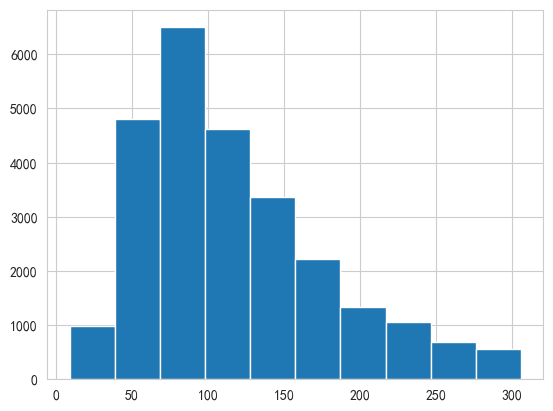

In [99]:
# A2
plt.subplot(111)
plt.hist(df['price'],bins=10)

<Axes: xlabel='price', ylabel='Count'>

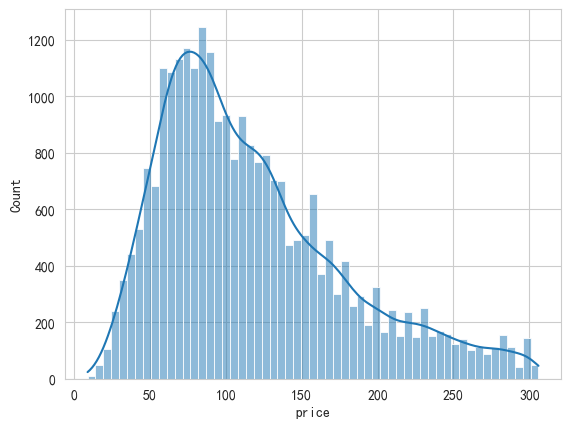

In [102]:
sns.histplot(data=df,x='price',kde=True)

In [106]:
# A6
df['toward'].value_counts()
df.groupby('toward').agg({
    'price':['mean','median'],
    'unit':'median',
    'building age':'mean'
})

C:\Users\CHMEI\AppData\Local\Temp\ipykernel_12964\2378136132.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('toward').agg({


price            unit building age
              mean median   median         mean
toward                                         
东北向     114.555333  100.0  12198.0    12.609524
东南向     115.542608  105.0  10864.0    10.951745
东向      110.158568   95.0  11421.0    12.761337
东西向      98.935099   82.0   9000.0    15.490066
北向       92.527907   75.5  11698.0    13.108527
南北向     119.472147  104.5  10000.0    12.073703
南向      114.555016  103.0  10759.0    11.551160
西北向     119.107594  105.0  12290.0    13.473684
西南向     139.711811  138.4  13333.0    13.452756
西向      102.662298   86.0  12528.0    13.385093

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

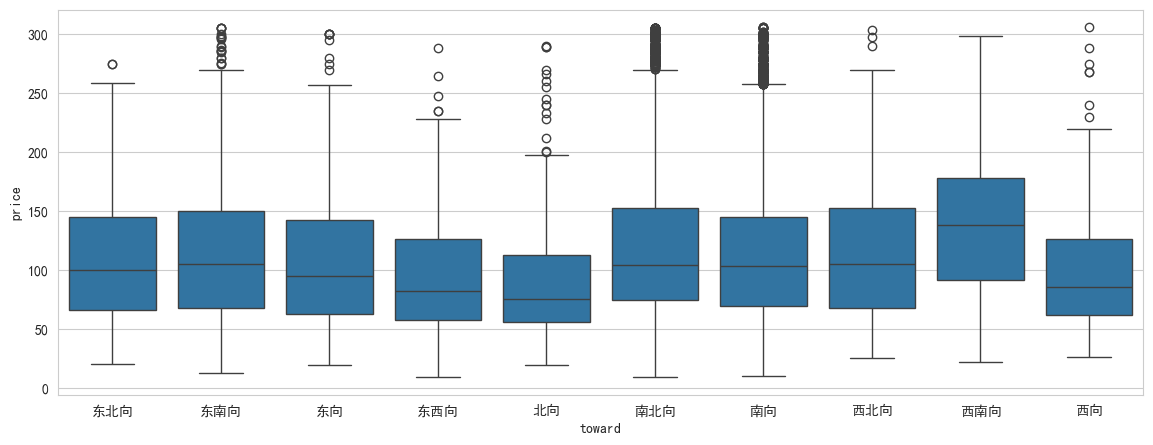

In [107]:
# visualization
plt.figure(figsize=(14,5))
sns.boxplot(x='toward',y='price',data=df)
plt.tight_layout